In [2]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 
%load_ext memory_profiler
from sklearn.metrics import make_scorer
from scipy.special import expit
import time
import math
import random
from memory_profiler import memory_usage
from sklearn import metrics as mt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold



from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

target_classifier = 'PC'
df = pd.read_csv('responses.csv', sep=",")

In [3]:
# remove rows whose target classfier value is NaN
df_cleaned_classifier = df[np.isfinite(df[target_classifier])]
# change NaN number values to the mean
df_imputed = df_cleaned_classifier.fillna(df.mean())
# get categorical features
object_features = list(df_cleaned_classifier.select_dtypes(include=['object']).columns)
# one hot encode categorical features
one_hot_df = pd.concat([pd.get_dummies(df_imputed[col],prefix=col) for col in object_features], axis=1)
# drop object features from imputed dataframe
df_imputed_dropped = df_imputed.drop(object_features, 1)
frames = [df_imputed_dropped, one_hot_df]
# concatenate both frames by columns
df_fixed = pd.concat(frames, axis=1)

In [4]:
# Research on Cost Matrix
# http://www.ibm.com/support/knowledgecenter/SSEPGG_11.1.0/com.ibm.im.model.doc/c_cost_matrix.html

cost_matrix = np.matrix([[0,1,2,3,4],
[1,0,1,2,3],
[3,1,0,1,2],
[5,3,1,0,1],
[7,5,2,1,0]])

def get_confusion_costTot(confusion_matrix, cost_matrix):
    score = np.sum(confusion_matrix*cost_matrix)
    return score

confusion_scorer = make_scorer(get_confusion_costTot, greater_is_better=False)
confusion_scorer

make_scorer(get_confusion_costTot, greater_is_better=False)

In [5]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if target_classifier in df_fixed:
    y = df_fixed[target_classifier].values # get the labels we want
    del df_fixed[target_classifier] # get rid of the class label
    X = df_fixed.values # use everything else to predict!

X = X/5
num_folds = 10

cv_object = StratifiedKFold(n_splits= num_folds, random_state=None, shuffle=True)
cv_object.split(X,y)

print(cv_object)

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)


In [6]:
for train_indices, test_indices in cv_object.split(X,y): 
        # I will create new variables here so that it is more obvious what 
        # the code is doing (you can compact this syntax and avoid duplicating memory,
        # but it makes this code less readable)
        X_train = (X[train_indices])
        y_train = y[train_indices]

    #     print(X_train)
    #     print(y_train)

        X_test = (X[test_indices])
        y_test = y[test_indices]

In [7]:



clf = MLPClassifier()
    



In [8]:
from sklearn.ensemble import BaggingClassifier

class MyEnsemble():
    
    def __init__(self, c, num_c, max_s, v):
        self.Ensemble = BaggingClassifier(base_estimator= c,
                                    n_estimators = num_c,
                                     max_samples = max_s,
                                     verbose = v)
    def predict(self, X):
        return self.Ensemble.predict(X)
    
    def fit(self, X,y):
        self.Ensemble.fit(X,y)
        
        
    def predict_proba(self, X):
        return self.Ensemble.predict_proba(X)

In [9]:
num_instances = 10


ensemble = MyEnsemble(clf, 10,y_train.shape[0],False)

ensemble.fit(X_train,y_train)
ensemble_y_hat = ensemble.predict(X_test)
# print(y_hat)
print(mt.confusion_matrix(ensemble_y_hat,y_test))

print(X_train.shape)

[[ 2  0  1  0  0]
 [ 7 12  5  2  1]
 [ 4  6 10  7  5]
 [ 0  1  4  6  4]
 [ 0  1  5  5 10]]
(906, 172)


In [10]:
ensemble.predict_proba(X_test)

array([[  1.30124009e-01,   1.36394680e-01,   1.32388344e-01,
          4.11404595e-01,   1.89688372e-01],
       [  2.10076883e-01,   2.68524820e-01,   1.59159311e-01,
          2.83123319e-01,   7.91156674e-02],
       [  1.24388693e-01,   1.30880250e-01,   5.08023523e-01,
          2.03174929e-01,   3.35326040e-02],
       [  4.54253927e-03,   4.13157086e-02,   8.06101339e-02,
          5.01088453e-01,   3.72443165e-01],
       [  3.47497381e-02,   1.15726046e-01,   3.35670426e-01,
          3.48024486e-01,   1.65829305e-01],
       [  1.82202183e-01,   3.34031656e-01,   3.26510577e-01,
          1.06108585e-01,   5.11469987e-02],
       [  5.49462249e-01,   2.47050709e-01,   1.79136204e-01,
          2.13726788e-02,   2.97815910e-03],
       [  3.58214402e-01,   5.22463048e-01,   6.07381928e-02,
          4.52772097e-02,   1.33071480e-02],
       [  2.68954375e-01,   2.96519548e-01,   2.64195020e-01,
          1.34513177e-01,   3.58178796e-02],
       [  2.54584173e-02,   1.1734382

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 2  7  4  0  0]
 [ 0 12  6  1  1]
 [ 1  5 10  4  5]
 [ 0  2  7  6  5]
 [ 0  1  5  4 10]]


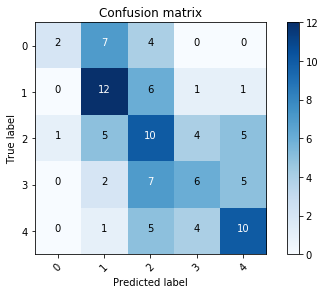

In [12]:
acc = mt.accuracy_score(y_test,ensemble_y_hat)
            #         lr_clf_accuracies.append(acc)
            #         cost_accuracies.append([acc])

ensemble_conf = mt.confusion_matrix(y_test,ensemble_y_hat)
plot_confusion_matrix(ensemble_conf, classes=[0, 1, 2, 3, 4])

Confusion matrix, without normalization
[[ 3  6  3  0  1]
 [ 2 10  6  1  1]
 [ 1  4  9  7  4]
 [ 1  2  5  9  3]
 [ 0  2  1  5 12]]


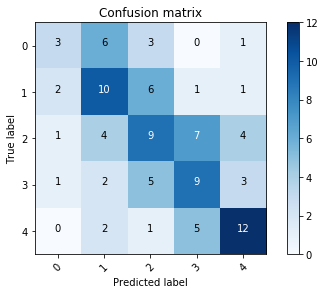

In [13]:
clf.fit(X_train, y_train)
clf_y_hat = clf.predict(X_test)
plot_confusion_matrix(mt.confusion_matrix(y_test, clf_y_hat), classes=[0, 1, 2, 3, 4])

In [37]:
ensemble_score = get_confusion_costTot(ensemble_conf, cost_matrix)
ensemble_score

908

In [38]:
ensemble_score

908

In [39]:
total_scores = []

estimators = ensemble.Ensemble.estimators_

for estimator in estimators:
    
    estimator.fit(X_train, y_train)
    estimator_y_hat = estimator.predict(X_test)
    estimator_conf = mt.confusion_matrix(y_test, estimator_y_hat)
    score = get_confusion_costTot(estimator_conf, cost_matrix)
    total_scores.append(score)
    

In [51]:
print(total_scores)

[894, 923, 928, 929, 924, 892, 921, 921, 895, 889, 908]


In [42]:
total_scores.append(ensemble_score)
print(total_scores)


[894, 923, 928, 929, 924, 892, 921, 921, 895, 889, 908]


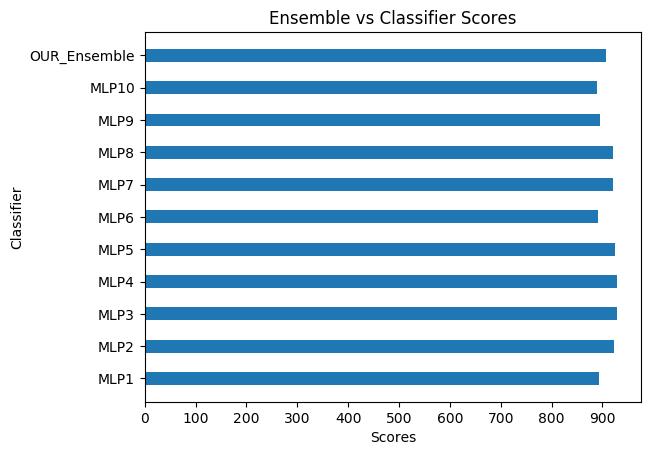

In [83]:
names = ('MLP1', 'MLP2', 'MLP3', 'MLP4', 'MLP5', 'MLP6', 'MLP7', 'MLP8', 'MLP9' ,'MLP10', "OUR_Ensemble")
yticks = [1,2,3,4,5,6,7,8,9,10,11]
xticks = [0,100,200,300,400,500,600,700,800,900]

fig = plt.figure()
plt.barh(nums, total_scores, 0.4)

plt.xlabel('Scores')
plt.ylabel('Classifier')
plt.yticks(yticks, names)
plt.xticks(xticks)
plt.title("Ensemble vs Classifier Scores")
